# Logistic Regression - Internet Advertisement

A model that predicts whether or not a user clicked on an ad, based on the different attributes of the user.

**Dataset**: advertising.csv

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [86]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

%matplotlib inline

## Exploring the Data

In [52]:
# Read in the data and briefly scan the data
df = pd.read_csv('data/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


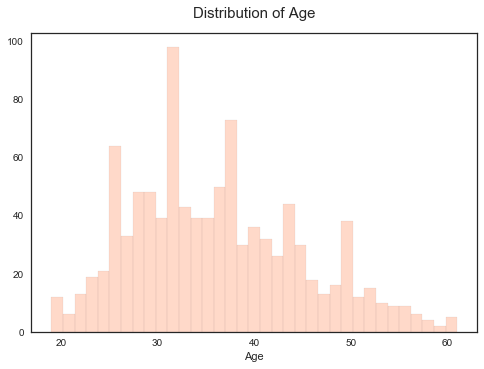

In [164]:
# Check distribution of Age
ax = sns.distplot(df['Age'], bins=35, kde=False, 
             color='lightsalmon', 
             hist_kws={'ec':'k', 'lw':0.1})

ax.set_title('Distribution of Age', fontsize=15, y=1.03)

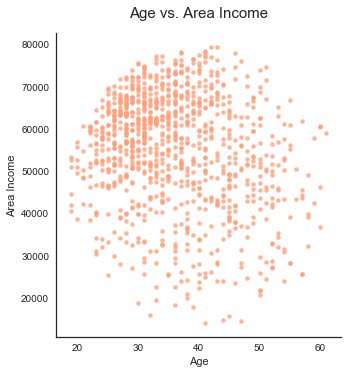

In [163]:
# Plot Age vs Area Income
ax = sns.lmplot(x='Age', y='Area Income', data=df, 
                fit_reg=False,
                scatter_kws={'s':20, 'color':'lightsalmon'})

plt.title('Age vs. Area Income', fontsize=15, y=1.03)

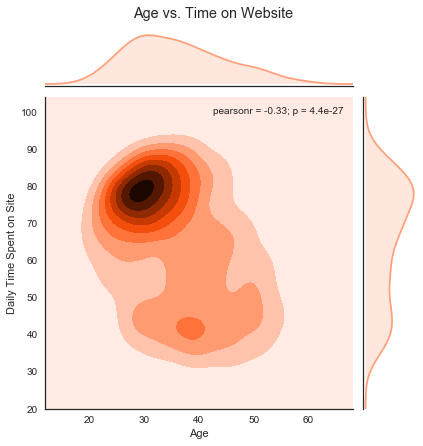

In [162]:
# Visualize KDE of Age vs Daily Time Spent on site
jp = sns.jointplot(x='Age', y='Daily Time Spent on Site', data=df, kind='kde', color='lightsalmon')

jp.fig.suptitle('Age vs. Time on Website', y=1.03)

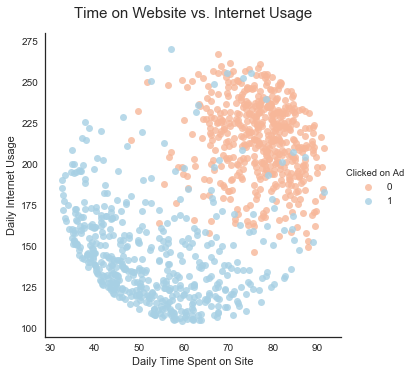

In [159]:
# Plot Daily Time Spent on Site vs Daily Internet Usage, classifying by 'Clicked on Ad'
sns.lmplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=df, 
           hue='Clicked on Ad', palette='RdBu', fit_reg=False)

plt.title('Time on Website vs. Internet Usage', fontsize=15, y=1.03)

## Logistic Regression

In [35]:
from sklearn.model_selection import train_test_split

In [46]:
# Split the dat into training and testing sets
cols = ['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']
X = df[cols]
y = df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [47]:
# Train and fit a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

logitmodel = LogisticRegression()
logitmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
# Predict using the test set
predictions = logitmodel.predict(X_test)

In [50]:
# Evaluate the prediction results
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))

cfm = confusion_matrix(y_test, predictions)

true_negative = cfm[0][0]
true_positive = cfm[1][1]
false_negative = cfm[1][0]
false_positive = cfm[0][1]

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', true_negative)
print('True Positive:', true_positive)
print('False Negative:', false_negative)
print('False Positive:', false_positive)

print('Correct Predictions', round((true_negative + true_positive) / len(predictions) * 100, 1), '%')

             precision    recall  f1-score   support

          0       0.90      0.90      0.90       155
          1       0.89      0.90      0.89       145

avg / total       0.90      0.90      0.90       300

Confusion Matrix: 
 [[139  16]
 [ 15 130]] 

True Negative: 139
True Positive: 130
False Negative: 15
False Positive: 16
Correct Predictions 89.7 %
